# UBER Pickups 


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />


## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 


#Setup

In [1]:
import pandas as  pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from zipfile import ZipFile

In [2]:
# specifying the zip file name
import tensorflow as tf
file_name0 = "https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip"
tf.keras.utils.get_file(fname = "/content/uber-trip-data.zip",
                        origin = file_name0,
    extract=True)


'/content/uber-trip-data.zip'

In [3]:

file_name = "uber-trip-data.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip :
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
uber-trip-data/                                2016-01-14 21:57:14            0
__MACOSX/._uber-trip-data                      2016-01-14 21:57:14          212
uber-trip-data/taxi-zone-lookup.csv            2016-01-14 21:57:14         7714
__MACOSX/uber-trip-data/._taxi-zone-lookup.csv 2016-01-14 21:57:14          212
uber-trip-data/uber-raw-data-janjune-15.csv.zip 2016-01-14 21:57:14     70655400
__MACOSX/uber-trip-data/._uber-raw-data-janjune-15.csv.zip 2016-01-14 21:57:14          212
uber-trip-data/uber-raw-data-apr14.csv         2016-01-14 21:57:14     26110064
__MACOSX/uber-trip-data/._uber-raw-data-apr14.csv 2016-01-14 21:57:14          212
uber-trip-data/uber-raw-data-aug14.csv         2016-01-14 21:57:14     38324585
__MACOSX/uber-trip-data/._uber-raw-data-aug14.csv 2016-01-14 21:57:14          212
uber-trip-data/uber-raw-data-sep14.csv         2016-01-14 21:57:14     47540750
__MACOSX/uber-trip-da

In [4]:
fname2 = 'uber-trip-data/uber-raw-data-janjune-15.csv.zip'
with ZipFile(fname2, 'r') as zip :
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
uber-raw-data-janjune-15.csv                   2015-10-08 12:11:20    551672691
__MACOSX/                                      2015-10-14 12:28:56            0
__MACOSX/._uber-raw-data-janjune-15.csv        2015-10-08 12:11:20          408
Extracting all the files now...
Done!


#Loading data

In [5]:
taxi_zone = 'taxi-zone-lookup.csv'
uber_data = ['uber-raw-data-apr14.csv','uber-raw-data-may14.csv',
             'uber-raw-data-jun14.csv','uber-raw-data-jul14.csv',
             'uber-raw-data-aug14.csv','uber-raw-data-sep14.csv',
             'uber-raw-data-janjune-15.csv' ]

In [6]:
df0 = pd.read_csv( 'uber-trip-data/'+ uber_data[0])

In [7]:
df0.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [8]:
df_zone = pd.read_csv('uber-trip-data/taxi-zone-lookup.csv')
df_zone.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


# Data cleaning

In [9]:
#Renaming columns
df0.columns = [x.lower().replace('/', '_') for x in df0.columns]
#converting date time
df0['date_time'] = pd.to_datetime(df0['date_time'])
df0['day'] = df0.date_time.dt.dayofweek
df0['week_day'] = df0.date_time.dt.day_name()
df0['hour'] = df0.date_time.dt.hour

In [10]:
#defining shift hours for uber drivers and users. 
#values were picked after going over the data.
def shift_day(x):
  if x <= 6 :
    y= 'night'
  elif x <= 10 : 
    y = 'morning'
  elif x <= 15 :
    y = 'afternoon'
  else:
    y = 'evening'
  return y

df0['shift'] = df0.hour.apply(lambda x: shift_day(x))
df0['shift_num'] = pd.factorize(df0.hour)[0]

In [11]:
df0= df0.sort_values(by = ['day','hour']) #sorting df for the plotting

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564516 entries, 7785 to 563277
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  564516 non-null  datetime64[ns]
 1   lat        564516 non-null  float64       
 2   lon        564516 non-null  float64       
 3   base       564516 non-null  object        
 4   day        564516 non-null  int64         
 5   week_day   564516 non-null  object        
 6   hour       564516 non-null  int64         
 7   shift      564516 non-null  object        
 8   shift_num  564516 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 43.1+ MB


In [13]:
df0.describe()

,lat,lon,day,hour,shift_num
count,564516.000000,564516.000000,564516.00000,564516.000000,564516.000000
mean,40.740005,-73.976817,2.86698,14.465043,14.465043
std,0.036083,0.050426,1.82081,5.873925,5.873925
min,40.072900,-74.773300,0.00000,0.000000,0.000000
25%,40.722500,-73.997700,1.00000,10.000000,10.000000
50%,40.742500,-73.984800,3.00000,16.000000,16.000000
75%,40.760700,-73.970000,4.00000,19.000000,19.000000
max,42.116600,-72.066600,6.00000,23.000000,23.000000


# Data visualization


Figure - Number of Uber rides per hour




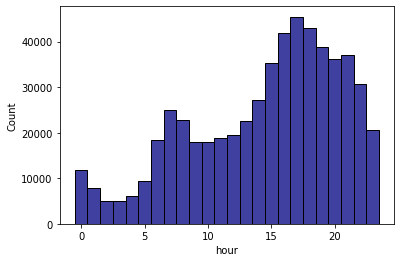

In [14]:
print("""
Figure - Number of Uber rides per hour\n
""")
fig = sns.histplot(data = df0, x="hour", 
                   discrete=True, color = 'navy')


Figure - Number of Uber rides per day of week




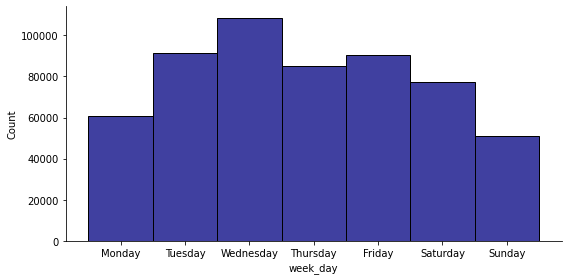

In [15]:
print("""
Figure - Number of Uber rides per day of week\n
""")
fig = sns.displot(data = df0, x="week_day", 
                   discrete=True, color = 'navy',
                  height=4,aspect=2)

We can observe that

* Most of the Uber rides has been completed after 15:00 peaking at 17:00
* The days with the most Uber rides are Wednesday and Tuesday.


Figure - Number of Uber rides per hour and per day of week 




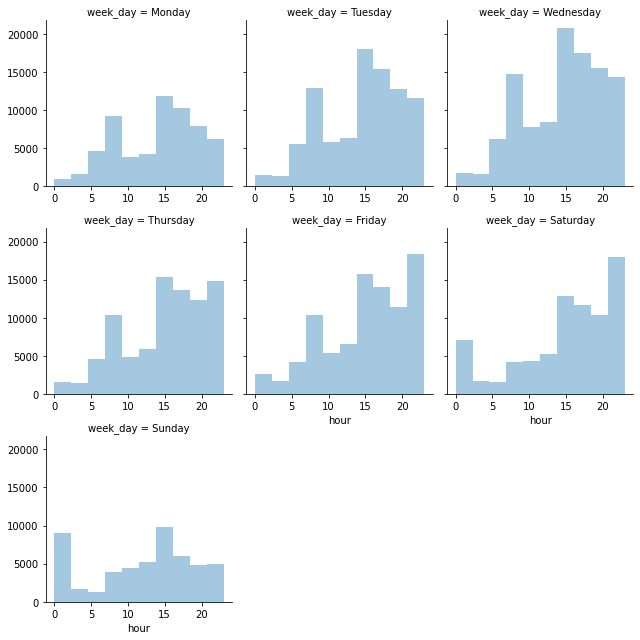

In [16]:
print("""
Figure - Number of Uber rides per hour and per day of week \n
""")
fig1 = sns.FacetGrid( data= df0, col="week_day", col_wrap=3, sharex=False)
fig1.map(plt.hist, "hour", alpha=.4)
fig1.savefig("figs/fig1.png")

We can see a similar trend in Uber pickups from Tuesdays to Friday

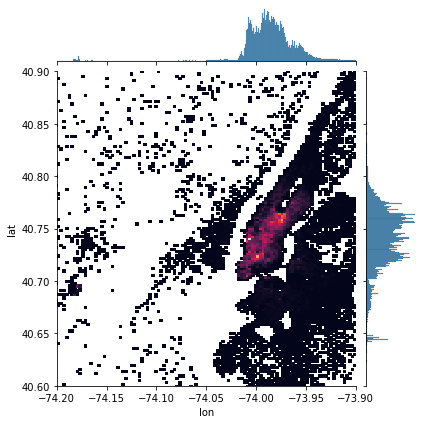

In [17]:
#let's check the density of lat and lons below - nyc
fig2= sns.jointplot(data=df0, x="lon", y="lat", kind="hist",
              xlim=[-74.2,-73.9],  ylim=[40.6,40.9],
              joint_kws=dict(bins=1000), 
              cmap = 'rocket',
              )
fig2.savefig("figs/fig2.png")

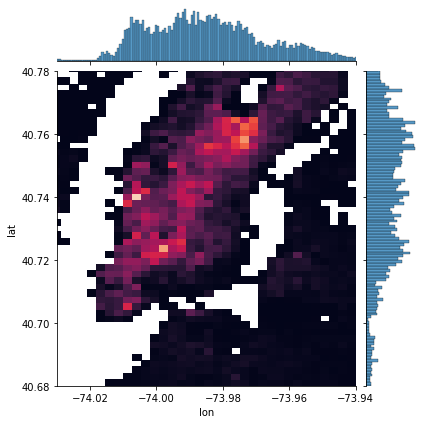

In [59]:
#let's zoom in manhattan island
fig2= sns.jointplot(data=df0, x="lon", y="lat", kind="hist",
              xlim=[-74.03,-73.94],  ylim=[40.68,40.78],
              joint_kws=dict(bins=1000),
              cmap = 'rocket',
              )
fig2.savefig("figs/fig2-zoom.png")

We can see certain hotspots among Uber pickups.

# Kmeans method

Staring with KMeans to get to know Uber pickups. Let's consider ```lat```, ```lon```, ```day``` and ```hour``` to find any possible patterns.

## Preprocessing of data

In [19]:
X_ = df0 [["lat","lon","day","shift_num"]]
sc = StandardScaler()
X_norm = sc.fit_transform(X_)
X_norm[:5]

array([[-0.54056242, -0.33877829, -1.57456387, -2.46258789],
       [ 0.01925531, -0.61244781, -1.57456387, -2.46258789],
       [ 0.52918829, -0.24557201, -1.57456387, -2.46258789],
       [ 0.0525118 , -0.52717398, -1.57456387, -2.46258789],
       [ 0.15505268, -0.00958163, -1.57456387, -2.46258789]])

## Fitting KMeans

Determining our clusters, we first need to define the optimum number of clusters. Let's use ```Elbow``` method to understand to estimate a value for ```k```.

In [20]:
#taking 5 percent of data by respecting to hour distribution 
#it is done to handle long computing hours and consequent crashes
#solution adapted by a response on stackoverflow
df_X_norm = pd.DataFrame(X_norm)
df_X_norm = df_X_norm.groupby(3, group_keys=False)\
                     .apply(lambda x: x.sample(frac=0.05))

X_norm_sampled = df_X_norm.to_numpy()

In [21]:
# Sum of within-cluster variance: WCSS 
# WCSS indicates a cumulative measure how well data is clustered among different groups. 
# Here, k-means++ is used to help with the issue of local min. convergence
wcss =  []
for ii in range (2,16): 
    kmeans = KMeans(n_clusters= ii, init="k-means++")
    kmeans.fit(X_norm_sampled)
    wcss.append(kmeans.inertia_)
print(wcss)

[92051.22830916807, 76687.5141976602, 62803.773439255194, 55308.69064292888, 49651.70802600116, 45329.75712360892, 42422.88334757508, 38534.47430948034, 36048.185782978355, 33887.04866794327, 31928.66952317913, 30468.45816920553, 28899.37285855884, 27613.34389662282]


In [22]:
#checkpoint 
pd.DataFrame(wcss).to_csv("data/kmeans_wcss.csv",index=False)

In [23]:
#printing results
# Plot helps us in determing number of clusters. 
fig = px.line(x = range(2,16), y = wcss)
fig.show()

Using the _Silhouette_ method to understand whether the hypothesis for ```k``` can be refined.

In [24]:
# attention, running this part of the code can take very long and crash
s_score = []
for i in range (2,16): 
    kmeans = KMeans(n_clusters= ii)
    kmeans.fit(X_norm_sampled)
    s_score.append(silhouette_score(X_norm_sampled, kmeans.predict(X_norm_sampled)))
print(s_score)


[0.237963309424489, 0.23773432391602684, 0.2395939629230365, 0.2388569524186329, 0.23383423156633706, 0.2390134043852327, 0.23962598177955208, 0.23608208000441508, 0.23984441829094102, 0.2342966677251496, 0.23921439117605792, 0.2419242460418245, 0.23062621120843838, 0.23980887541013907]


In [25]:
#checkpoint 
pd.DataFrame(s_score).to_csv("data/kmeans_s_score.csv",index=False)

In [26]:
# printing score
fig = px.line(x = range(2,16), y = s_score)
fig.show()

Even K = 10 seems to work better, I choose $K=13$ to better seperate central Manhattan Island. Let's rerun KMeans with K clusters of 12.

In [50]:
# Let's use KMeans with the optimal number of clusters
# Here, k-means++ is used to help with the issue of local min. convergence
kmeans = KMeans(n_clusters= 13 , init="k-means++")
kmeans.fit(X_norm)

KMeans(n_clusters=13)

In [51]:
#Printing out the number  of clusters DBSCAN created. 
print(set(kmeans.labels_))
np.unique(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [52]:
kmeans.labels_

array([ 5,  5,  7, ...,  3,  0, 12], dtype=int32)

In [53]:
#adding a column "cluster_kmeans" so we can find the label of corresponding cluster.
df0["cluster_kmeans"] = kmeans.labels_

In [54]:
#checkpoint 1
df0.to_csv("data/kmeans_checkpoint_1.csv",index=False)

## Results of KMeans


Figure - Distribution of KMeans clusters




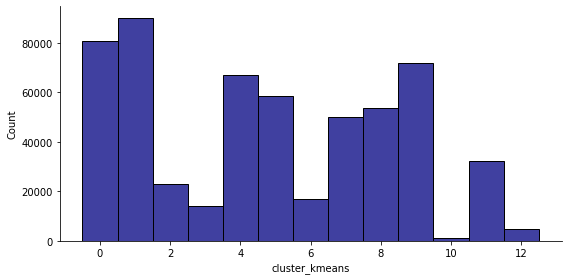

In [55]:
print("""
Figure - Distribution of KMeans clusters\n
""")
fig3 = sns.displot(data = df0, x="cluster_kmeans", 
                   discrete=True, color = 'navy',
                   height=4,aspect=2)
fig3.savefig("figs/fig_kmeans_cluster_dist.png")

In [56]:
#visualizing the clusters on a map except the outliers listed by DBScan.
fig4 = px.scatter_mapbox(
        df0[df0.cluster_kmeans != -1].sample(10000).sort_values(by= ["day"]),
        lat="lat", 
        lon="lon",
        color="cluster_kmeans",
        zoom = 10.0,
        mapbox_style="carto-positron",
        animation_frame ="week_day",
        color_continuous_scale='jet',
        opacity = 0.5,
        height = 700,
        hover_name = "cluster_kmeans",
        hover_data=['week_day','hour', 'shift']
)

fig4.write_html("figs/kmeans_results.html")
fig4.show()


Figure - Number of Uber rides per KMeans clusters and day of week 




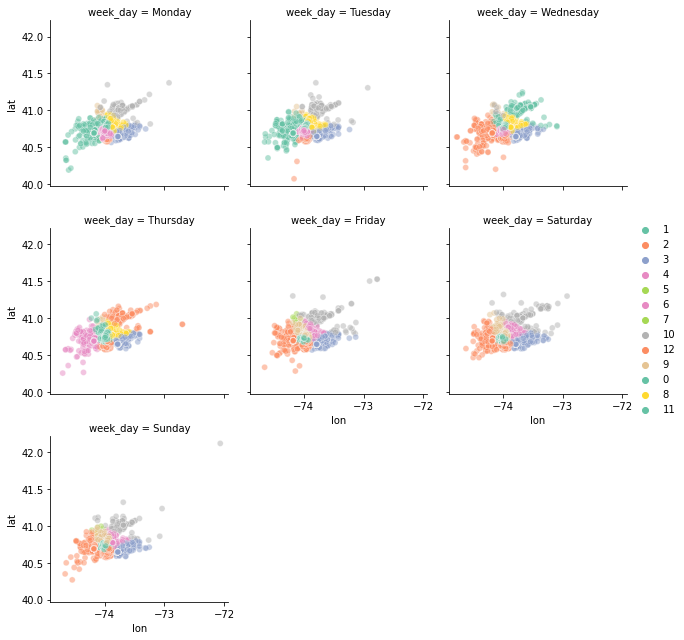

In [57]:
print("""
Figure - Number of Uber rides per KMeans clusters and day of week \n
""")
fig5 = sns.FacetGrid( data= df0, col="week_day", col_wrap=3, sharex=True)
fig5.map_dataframe(sns.scatterplot, x="lon", y="lat", 
                  hue="cluster_kmeans", alpha=.5,
                  palette='Set2')
fig5.add_legend()
fig5.savefig("figs/kmeans_clusters_7d.png")


Figure - Number of Uber rides per DBSCAN clusters per shift 




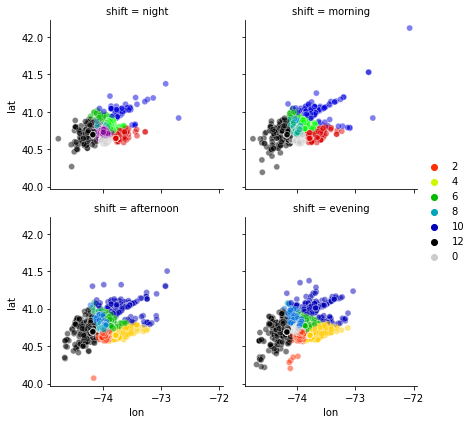

In [58]:
print("""
Figure - Number of Uber rides per DBSCAN clusters per shift \n
""")
fig = sns.FacetGrid( data= df0[df0.cluster_kmeans != -1], col="shift", 
                     col_wrap=2, sharex=True)
fig.map_dataframe(sns.scatterplot, x="lon", y="lat", 
                  hue="cluster_kmeans",
                  palette ="nipy_spectral_r", 
                  alpha=.5)
fig.add_legend()
fig.savefig("figs/kmeans_clusters_4shifts.png")

# DBSCAN Method

In this part, let's test DBSCAN method on the clustering problem. 

First, a variable X is created and it includes four columns. Note that this part is inspired by bootcamp class material (911 Emergencies exo).

In [36]:
#I am doing preprocessing again, but it is not neccessary as we did it in a previous method. 
col_selection=["lat","lon","day","shift_num"]
X_ = df0.loc[:,col_selection]

## Preprocessing of data

All of our data is numeric. Let's apply StandardScaler()



In [37]:
X_.nunique()

lat          4149
lon          5621
day             7
shift_num      24
dtype: int64

In [38]:
sc = StandardScaler()

# Preprocessings of the dataset
print("Preprocessing of the dataset...")
print(X_.head())
X_norm = sc.fit_transform(X_) # fit_transform !!
print('...Completed.')
print(X_norm[0:5, :])
print()

Preprocessing of the dataset...
           lat      lon  day  shift_num
7785   40.7205 -73.9939    0          0
7786   40.7407 -74.0077    0          0
7787   40.7591 -73.9892    0          0
7788   40.7419 -74.0034    0          0
15857  40.7456 -73.9773    0          0
...Completed.
[[-0.54056242 -0.33877829 -1.57456387 -2.46258789]
 [ 0.01925531 -0.61244781 -1.57456387 -2.46258789]
 [ 0.52918829 -0.24557201 -1.57456387 -2.46258789]
 [ 0.0525118  -0.52717398 -1.57456387 -2.46258789]
 [ 0.15505268 -0.00958163 -1.57456387 -2.46258789]]



In [39]:
type(X_norm)

numpy.ndarray

## Fitting DBSCAN

Let's import DBSCAN module. I start with the following paramers: `eps=0.2`, `metric="manhattan"` and  `min_samples=100`

In [40]:
from sklearn.cluster import DBSCAN
#eps : radious of search, metric - metric : manhattan for 2d lat lon data
db = DBSCAN(eps=0.18, min_samples=150, metric="manhattan")
db.fit(X_norm)

DBSCAN(eps=0.18, metric='manhattan', min_samples=150)

In [41]:
#Printing out the number  of clusters DBSCAN created. 
print(set(db.labels_))
np.unique(db.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, -1}


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38])

In [42]:
db.labels_

array([-1, -1, -1, ..., 33, -1, -1])

In [43]:
#adding a column "cluster" so we can find the label of corresponding cluster.
df0["cluster_dbscan"] = db.labels_

In [44]:
#checkpoint 2
df0.to_csv("data/dbscan_checkpoint_1.csv",index=False)

## Results of DBSCAN


Figure - Distribution of DBSCAN clusters




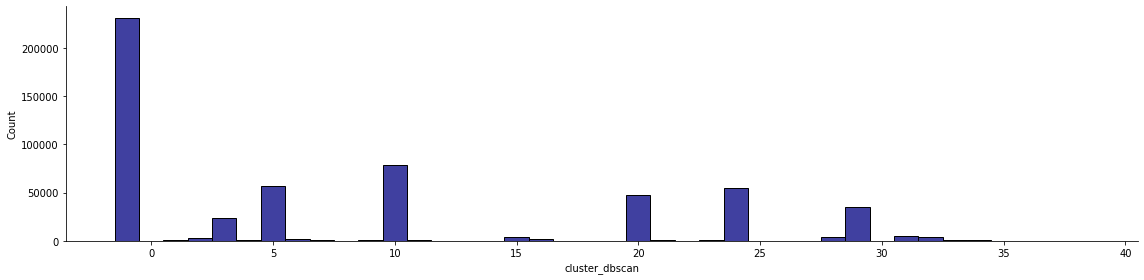

In [45]:
print("""
Figure - Distribution of DBSCAN clusters\n
""")
fig6 = sns.displot(data = df0, x="cluster_dbscan", 
                   discrete=True, color = 'navy',
                   height=4,aspect=4)

fig6.savefig("figs/fig_dbscan_cluster_dist.png")

In [46]:
#visualizing the clusters on a map except the outliers listed by DBScan.
fig7 = px.scatter_mapbox(
        df0[df0.cluster_dbscan != -1].sample(10000).sort_values(by= ["day"]),
        lat="lat", 
        lon="lon",
        color="cluster_dbscan",
        zoom = 10.0,
        mapbox_style="carto-positron",
        animation_frame ="week_day",
        color_continuous_scale='jet',
        opacity = 0.5,
        height = 700,
        hover_name = "cluster_dbscan",
        hover_data=['week_day','hour', 'shift']
)

fig7.write_html("figs/dbscan_results.html")
fig7.show()


Figure - Number of Uber rides per DBSCAN clusters per per day of week 




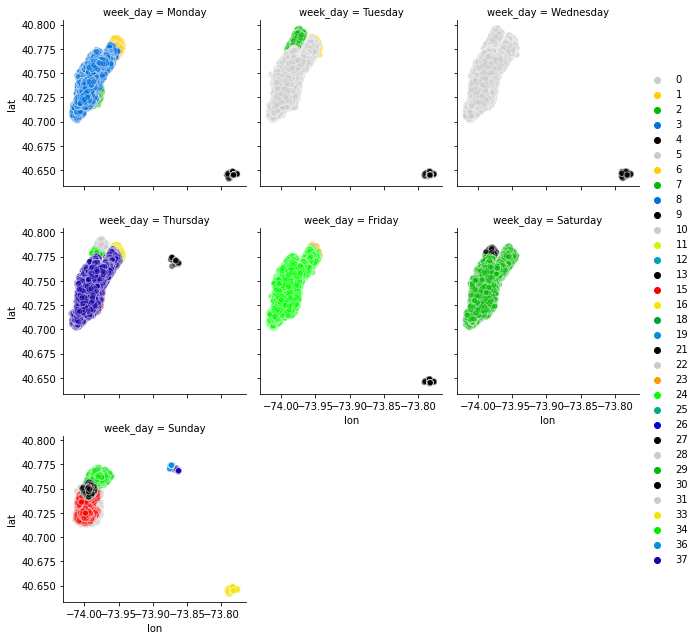

In [47]:
print("""
Figure - Number of Uber rides per DBSCAN clusters per per day of week \n
""")
fig8 = sns.FacetGrid( data= df0[df0.cluster_dbscan != -1], col="week_day", col_wrap=3, sharex=True)
fig8.map_dataframe(sns.scatterplot, x="lon", y="lat", 
                  hue="cluster_dbscan",
                  palette ="nipy_spectral_r", 
                  alpha=.5)
fig8.add_legend()
fig8.savefig("figs/dbscan_clusters_7d.png")


Figure - Number of Uber rides per DBSCAN clusters per shift 




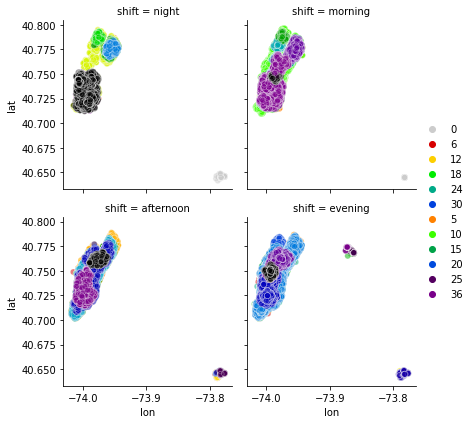

In [48]:
print("""
Figure - Number of Uber rides per DBSCAN clusters per shift \n
""")
fig9 = sns.FacetGrid( data= df0[df0.cluster_dbscan != -1], col="shift", 
                     col_wrap=2, sharex=True)
fig9.map_dataframe(sns.scatterplot, x="lon", y="lat", 
                  hue="cluster_dbscan",
                  palette ="nipy_spectral_r", 
                  alpha=.5)
fig9.add_legend()
fig9.savefig("figs/dbscan_clusters_4shifts.png")

In [49]:
#final dataset with cluster labels 
df0.to_csv("data/uber-raw-data-apr14_wclusters.csv",index=False)

# Summary ⚡ 


**Uber** wants to guide their drivers on hot spots to optimize the waiting time of a user. With Uber pickup data in New York City analyzed first, two unsupervised deep learning methods: KMeans and DBSCAN are then applied to identify these hotzones on daily basis. 


---

We observed that 🎯

* the highest demand is within Manhattan island and particulary on downtown area (China Town, Soho, Tribeca Greenwich Village, Chelsea, etc.), midtown area (Garment District, Murray Hill, etc.) and some parts of Upper East Side.

* demands increase after 15h from Tuesday to Friday and peak at 17h. 

* demands vanish very much in the night from 23h to  06h. Exceptionally, on Fridays and Saturdays, demands are high till 01h.

* demands increase for couple hours at morning at around 7h

* Mondays, Saturdays and Sundays have unique patterns of pickup demands and differnt from Tuesdays to Fridays.

* Uber drivers are in constant demand at JFK and LaGuardia airports. Seen the distance that each rider needs to take from the airports to the city, it can be, without doubt, very profitable to be a Uber driver around the airports.

---
* **with KMeans,** 12 clusters are used as optimal. Approximate clusters are like that one for lower + midtown Manhattan, one for upper Manhattan, one for Brooklyn and some others for various suburbs.  

* **with DBSCAN,**

> a.  my first trials with ep=0.2 -- 0.3 (not shown here) resulted in single clusters for Manhattan Island, unique for each day from Monday to Friday. For weekend, there is more than one cluster within Manhattan Island. Clustered areas are located away from the central island.

> b.  my last trial resulted in many clusters for Manhattan Island. The second model is kept to better find hotspots in Manhattan and position drivers in Manhattan Island. In both cases, there are plenty of nonclustered data points.

---

✅ KMeans and DBSCAN  both positive and negative aspects. I would prefer KMeans for having control over cluster numbers and DBSCAN for the cases with many variables making it diffucult to identify patterns visually. 


<img src="https://cdn.civitatis.com/estados-unidos/nueva-york/galeria/barrios-manhattan.jpg" alt="NYC Neighborhoods" width="50%" />

*End of notebook*
# END